In [57]:
import pandas as pd
import numpy as np

from scipy import stats

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
audience_link_actors = pd.read_json('data/audience-graph-link-actors.json', lines=True)

In [3]:
headlines_ab = pd.read_json('data/headline-graph-ab-clf.json', lines=True)

In [5]:
audience_link_actors.head(10)

,d1,d2,label,score,zscore
0,nytimes.com,washingtonpost.com,nytimes.com - washingtonpost.com,3.123226,254.598270
1,breitbart.com,dailycaller.com,breitbart.com - dailycaller.com,2.879639,233.759026
2,breitbart.com,foxnews.com,breitbart.com - foxnews.com,2.768800,224.276625
3,cnn.com,nytimes.com,cnn.com - nytimes.com,2.653588,214.420045
4,dailycaller.com,foxnews.com,dailycaller.com - foxnews.com,2.178174,173.747754
5,thehill.com,washingtonpost.com,thehill.com - washingtonpost.com,2.148124,171.176885
6,cnn.com,washingtonpost.com,cnn.com - washingtonpost.com,2.127655,169.425750
7,cnn.com,thehill.com,cnn.com - thehill.com,2.110772,167.981431
8,nytimes.com,thehill.com,nytimes.com - thehill.com,1.813567,142.555148
9,rt.com,sputniknews.com,rt.com - sputniknews.com,1.692679,132.212951


In [6]:
headlines_ab.head(10)

,acc,d1,d2,label,score
0,0.943206,buzzfeed.com,sputniknews.com,buzzfeed.com - sputniknews.com,2.057104
1,0.938515,buzzfeed.com,rt.com,buzzfeed.com - rt.com,1.977826
2,0.935927,apnews.com,buzzfeed.com,apnews.com - buzzfeed.com,1.934097
3,0.924572,bloomberg.com,buzzfeed.com,bloomberg.com - buzzfeed.com,1.742192
4,0.923548,buzzfeed.com,thehill.com,buzzfeed.com - thehill.com,1.724889
5,0.918354,buzzfeed.com,wsj.com,buzzfeed.com - wsj.com,1.637117
6,0.918224,dailykos.com,sputniknews.com,dailykos.com - sputniknews.com,1.634915
7,0.915208,breitbart.com,buzzfeed.com,breitbart.com - buzzfeed.com,1.583950
8,0.909270,dailykos.com,rt.com,dailykos.com - rt.com,1.483593
9,0.900819,buzzfeed.com,foxnews.com,buzzfeed.com - foxnews.com,1.340766


In [14]:
ac = audience_link_actors.merge(headlines_ab, on=['d1', 'd2'], suffixes=('_audience', '_content'))
ac['score_content'] = -ac['score_content']

In [44]:
points = (alt
     .Chart(ac)
     .mark_circle(size=50)
     .encode(x='score_audience', y='score_content', tooltip='label_content'))

In [45]:
xfit = np.linspace(ac.score_audience.min(), ac.score_audience.max())
yfit = np.poly1d(np.polyfit(ac.score_audience, ac.score_content, 1))(xfit)
fit_df = pd.DataFrame(list(zip(xfit, yfit)), columns=('x', 'y'))

In [42]:
fit = alt.Chart(fit_df).mark_line().encode(x='x', y='y')

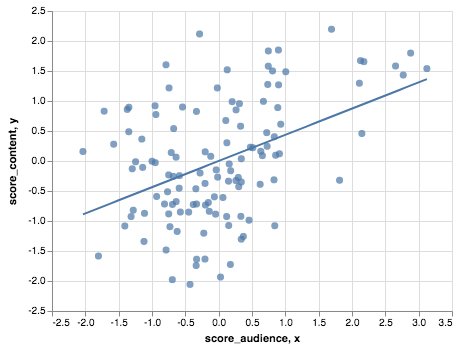

In [46]:
points + fit

In [53]:
ac['score_delta'] = ac.score_content - ac.score_audience

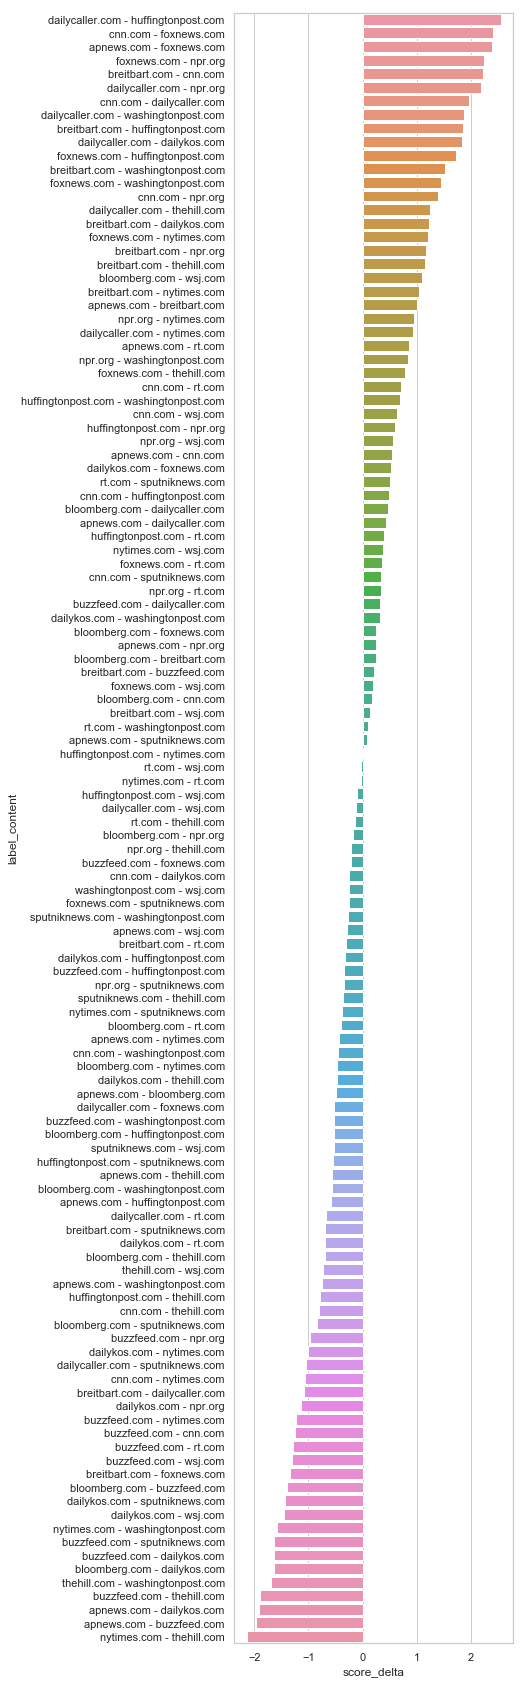

In [56]:
plt.figure(figsize=(5,30))
sns.barplot(x='score_delta', y='label_content', data=ac.sort_values('score_delta', ascending=False))